## 딥러닝

### 심층신경망

In [6]:
# 모듈 로드
import tensorflow as tf
from tensorflow import keras

In [7]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

- 이미 이전장에서 다운로드 했기 때문에 다시 다운로드 하지 않음

In [16]:
# 훈련세트, 검증세트 분리
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

In [17]:
train_input = train_input.reshape(-1, 28*28)
test_input = test_input.reshape(-1, 28*28)

In [19]:
# 스케일링
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train_input.astype(np.float64))
test_scaled = scaler.transform(test_input.astype(np.float64))

In [21]:
# 훈련세트, 검증세트 분리
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42
)

In [22]:
print(train_scaled.shape, val_scaled.shape, test_scaled.shape)
print(train_target.shape, val_target.shape, test_target.shape)

(48000, 784) (12000, 784) (10000, 784)
(48000,) (12000,) (10000,)


#### 심층신경망 만들기

In [ ]:
# 밀집층 생성
dense1 = keras.layers.Dense(100, activation='sigmoid', input_shape=(784,), name='hidden')
dense2 = keras.layers.Dense(10, activation='softmax', name='output')

In [26]:
# 신경망 모델 생성
model = keras.Sequential([dense1, dense2])

In [38]:
# 모델 요약
model.summary()



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden (Dense)              (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### 심층신경망 만들기 2

In [48]:
model = keras.Sequential([
    keras.layers.Dense(100, activation='sigmoid', input_shape=(784,), name='hidden'),
    keras.layers.Dense(10, activation='softmax', name='output')
], name='Fashion_MNIST_Model')

In [49]:
model.summary()

Model: "Fashion_MNIST_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden (Dense)              (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [56]:
# 모델 훈련 전 설정
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [57]:
# 훈련
model.fit(train_scaled, train_target, epochs=100)

Epoch 1/100


1500/1500 [==============================] - 2s 1ms/step - loss: 0.4670 - accuracy: 0.8381
Epoch 2/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3562 - accuracy: 0.8721
Epoch 3/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3198 - accuracy: 0.8862
Epoch 4/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2948 - accuracy: 0.8926
Epoch 5/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2752 - accuracy: 0.9008
Epoch 6/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2580 - accuracy: 0.9060
Epoch 7/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2435 - accuracy: 0.9125
Epoch 8/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2306 - accuracy: 0.9166
Epoch 9/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2176 - accuracy: 0.9214
Epoch 10/100
1500/1500 [==============================] - 2s 1ms/step -

In [60]:
model.evaluate(val_scaled, val_target)
# 검증 정확도 : 87.4%

375/375 [==============================] - 0s 1ms/step - loss: 0.8392 - accuracy: 0.8748


[0.8391771912574768, 0.874750018119812]

In [61]:
pred_result = model.predict(test_scaled)

313/313 [==============================] - 0s 893us/step


In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [66]:
# 한글로 Matplotlib 사용시 항상 필요
from matplotlib import rcParams, font_manager, rc

font_path = 'C:/Windows/Fonts/malgun.ttf'
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
rcParams['axes.unicode_minus'] = False

sns.set_style('darkgrid')
sns.set_theme(font='Malgun Gothic', rc={'axes.unicode_minus': False})

In [75]:
class_names = ['티셔츠', '바지', '스웨터', '드레스', '코트',  '샌들', '셔츠', '스니커즈', '가방', '앵클부츠']

In [86]:
# 테스트이미지와 예측결과 시각화
def show_image(index):
    plt.figure(figsize=(2,2))
    plt.imshow(test_input[index].reshape(28, 28), cmap='gray_r')
    true_label = class_names[test_target[index]]
    pred_label = class_names[np.argmax(pred_result[index])]
    
    #plt.title(f'실제: {true_label}, 예측: {pred_label}')
    # plt.title(f'', fontsize=13)
    plt.text(0, -6, f'실제: {true_label}', fontsize=12, color='blue')
    plt.text(0, -3, f'예측: {pred_label}', fontsize=12, color='red', fontweight='bold')


    plt.axis('off')
    plt.show()

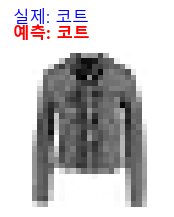

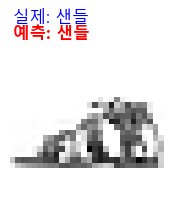

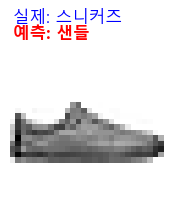

In [89]:
for i in range(10, 13):
    show_image(i)

#### 렐루 함수

- 인공신경망 은닉층에 초기에는 sigmoid 함수 사용
    - 단점 : 오른쪽, 왼쪽 끝으로 갈수록 그래프가 누워있어서 올바른 출력을 할 수 없음

- 렐루함수(ReLU) : 수정된 선형유닛 뜻의 함수

    <img src="../image/ml0011.png" width="500">


#### Flatten 객체
- 이미지 2차원 배열을 1차원으로 변경할 때 np.reshape() 사용
- Flatten 클래스가 위의 일을 대신해줌

In [ ]:
model2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28), name='flatten'),
    keras.layers.Dense(100, activation='relu', name='hidden'),
    keras.layers.Dense(10, activation='softmax', name='output')
], name='Fashion_MNIST_RELU')

In [98]:
model2.summary()

Model: "Fashion_MNIST_RELU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 hidden (Dense)              (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [99]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [101]:
train_scaled = train_input / 255.0
test_scaled = test_input / 255.0

In [102]:
# 훈련세트, 검증세트 분리
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42
)

In [103]:
# 모델 설정
model2.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

In [104]:
# 모델 훈련
model2.fit(train_scaled, train_target, epochs=20)

Epoch 1/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.5333 - accuracy: 0.8125
Epoch 2/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3978 - accuracy: 0.8567
Epoch 3/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3567 - accuracy: 0.8721
Epoch 4/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3345 - accuracy: 0.8799
Epoch 5/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3176 - accuracy: 0.8841
Epoch 6/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3056 - accuracy: 0.8914
Epoch 7/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2975 - accuracy: 0.8946
Epoch 8/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2862 - accuracy: 0.8994
Epoch 9/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2777 - accuracy: 0.9014
Epoch 10/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.272

In [106]:
model2.evaluate(val_scaled, val_target)
# ReLU 함수 사용시, Sigmoid 함수 사용시 0.01% 개선

375/375 [==============================] - 0s 896us/step - loss: 0.4342 - accuracy: 0.8777


[0.4342062473297119, 0.8777499794960022]

#### 옵티마이저
- 하이퍼파라미터 값 최적화

In [107]:
model3 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28), name='flatten'),
    keras.layers.Dense(100, activation='relu', name='hidden'),
    keras.layers.Dense(10, activation='softmax', name='output')
], name='Fashion_MNIST_RELU')

In [ ]:
# 모델3 설정, 최적화는 adam클래스만 사용할 것
model3.compile(loss='sparse_categorical_crossentropy', metrics='accuracy', optimizer='adam')

In [112]:
# 모델 훈련. 모델 훈련은 정보를 저장하기 때문에 재수행하면 이전 정보를 담고 시작
model3.fit(train_scaled, train_target, epochs=20)

Epoch 1/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1774 - accuracy: 0.9336
Epoch 2/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.1739 - accuracy: 0.9347
Epoch 3/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.1699 - accuracy: 0.9367
Epoch 4/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.1655 - accuracy: 0.9380
Epoch 5/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.1613 - accuracy: 0.9398
Epoch 6/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1577 - accuracy: 0.9409
Epoch 7/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.1542 - accuracy: 0.9423
Epoch 8/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1500 - accuracy: 0.9448
Epoch 9/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1463 - accuracy: 0.9442
Epoch 10/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.144

- optimizer 사용 시 0.01 정도 개선

In [121]:
model3.evaluate(val_scaled, val_target)
# 훈련 95%, 검증 88% - 7% 정도 차이 발생

375/375 [==============================] - 0s 992us/step - loss: 0.4330 - accuracy: 0.8852


[0.43304243683815, 0.8852499723434448]

#### 드롭아웃
- 훈련과정 밀집층에 일부 뉴런을 꺼버림.

In [113]:
model4 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28), name='flatten'),
    keras.layers.Dense(100, activation='relu', name='hidden'),
    keras.layers.Dropout(0.3, name='dropout'), 
    keras.layers.Dense(10, activation='softmax', name='output')
], name='Fashion_MNIST_RELU')

In [116]:
model4.summary()

Model: "Fashion_MNIST_RELU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 hidden (Dense)              (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [118]:
# 모델4 설정
model4.compile(loss='sparse_categorical_crossentropy', metrics='accuracy', optimizer='adam')

In [142]:
# 모델 훈련
model4.fit(train_scaled, train_target, epochs=20)

Epoch 1/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2689 - accuracy: 0.8993
Epoch 2/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2651 - accuracy: 0.8984
Epoch 3/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2652 - accuracy: 0.8992
Epoch 4/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2596 - accuracy: 0.9025
Epoch 5/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2577 - accuracy: 0.9009
Epoch 6/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2548 - accuracy: 0.9029
Epoch 7/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2551 - accuracy: 0.9038
Epoch 8/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2480 - accuracy: 0.9053
Epoch 9/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2473 - accuracy: 0.9063
Epoch 10/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.245

In [122]:
model4.evaluate(val_scaled, val_target)
# 훈련 89%, 검증 88% - 1% 차이(훈련과 검증 사이에 차이가 거의 없음)

375/375 [==============================] - 0s 894us/step - loss: 0.3232 - accuracy: 0.8852


[0.3232327401638031, 0.8851666450500488]

- 드롭아웃 -> 정확도가 떨어짐 > 훈련과 검증(테스트) 사이에 정확도 차이가 줄어듬
- `과대적합`(훈련세트 훈련에 너무 치중하여서 정확도가 너무 높은 것) 방지

#### 모델의 저장과 복원
- 훈련시간이 딥러닝에 크게 좌우됨. 저장이 없으면 다시 훈련시키고 시간을 소요해야 됨
- 파일로 저장 후 모델에 대한 구조와 파라미터만 저장하는 두 가지 방법이 존재

In [123]:
# 모델 4 저장 - 파라미터만 저장
model4.save_weights('./model4-weight.h5')

In [124]:
# 모델 4 저장 - 전체(모델 구조와 파라미터)
model4.save('./model4-whole.h5')

c:\Source\iot-dataanalysis-2025\mlvenv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


##### 모델 사용
- 파라미터만 저장한 파일을 사용하려면, 먼저 모델을 생성해야 함

In [125]:
model5 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28), name='flatten'),
    keras.layers.Dense(100, activation='relu', name='hidden'),
    keras.layers.Dropout(0.3, name='dropout'), 
    keras.layers.Dense(10, activation='softmax', name='output')
], name='Fashion_MNIST_RELU5')

In [126]:
model5.load_weights('./model4-weight.h5')

In [133]:
pred_result = model5.predict(test_scaled)

313/313 [==============================] - 0s 871us/step


In [135]:
model5.summary()

Model: "Fashion_MNIST_RELU5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 hidden (Dense)              (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


- 모델까지 전부 생성해주는 방법

In [134]:
model6 = keras.models.load_model('./model4-whole.h5')

In [137]:
model6.summary()

Model: "Fashion_MNIST_RELU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 hidden (Dense)              (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [138]:
model6.evaluate(test_scaled, test_target)

313/313 [==============================] - 0s 961us/step - loss: 0.3481 - accuracy: 0.8787


[0.34809842705726624, 0.8787000179290771]

#### 콜백
- 실행도중 다른 일을 할 수 있도록 해주는 기능
- `조기 종료`를 위해 사용

In [139]:
model7 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28), name='flatten'),
    keras.layers.Dense(100, activation='relu', name='hidden'),
    keras.layers.Dropout(0.3, name='dropout'), 
    keras.layers.Dense(10, activation='softmax', name='output')
], name='Fashion_MNIST_RELU7')

In [140]:
# 모델7 설정
model7.compile(loss='sparse_categorical_crossentropy', metrics='accuracy', optimizer='adam')

In [147]:
# 에포크마다 모델 저장 기능 콜백
checkpoint_cb = keras.callbacks.ModelCheckpoint('./best-model.h5', save_best_only=True) # 최고 상태이면 저장
# 조기 종료 콜백
## 두 번(patience) 이상 훈련값이 동일하면 조기 종료! 이전 최고 상태로 복구
early_stopp_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True) 

In [143]:
# 모델 훈련
model7.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target),
           callbacks=[checkpoint_cb, early_stopp_cb])

Epoch 1/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5907 - accuracy: 0.7916 - val_loss: 0.4229 - val_accuracy: 0.8462
Epoch 2/20
  72/1500 [>.............................] - ETA: 2s - loss: 0.4404 - accuracy: 0.8372

c:\Source\iot-dataanalysis-2025\mlvenv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1500/1500 [==============================] - 2s 2ms/step - loss: 0.4401 - accuracy: 0.8423 - val_loss: 0.3897 - val_accuracy: 0.8572
Epoch 3/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.4003 - accuracy: 0.8566 - val_loss: 0.3709 - val_accuracy: 0.8651
Epoch 4/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3829 - accuracy: 0.8600 - val_loss: 0.3441 - val_accuracy: 0.8725
Epoch 5/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3636 - accuracy: 0.8655 - val_loss: 0.3425 - val_accuracy: 0.8748
Epoch 6/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3546 - accuracy: 0.8691 - val_loss: 0.3471 - val_accuracy: 0.8726
Epoch 7/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3445 - accuracy: 0.8728 - val_loss: 0.3343 - val_accuracy: 0.8792
Epoch 8/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3349 - accuracy: 0.8769 - val_loss: 0.3413 - val_accuracy: 0.8750
Epo

In [144]:
model7.evaluate(val_scaled, val_target)

375/375 [==============================] - 0s 994us/step - loss: 0.3257 - accuracy: 0.8777


[0.3256511688232422, 0.8777499794960022]

In [145]:
model7.evaluate(test_scaled, test_target)

313/313 [==============================] - 0s 905us/step - loss: 0.3596 - accuracy: 0.8708


[0.3595689535140991, 0.8708000183105469]

In [146]:
early_stopp_cb.stopped_epoch

10

- 20번 중 10번 반복해서 조기종료

#### 결론
- `심층 신경망` : 2개 이상의 밀집층을 포함한 신경망 모델. 다층 인공신경망
- `렐루 함수` : 시그모이드 함수의 단점을 보완한 활성화 함수
- `옵티마이저` : 신경망의 가중치(기울기)와 절편을 학습하기 위한 알고리즘 또는 방법. `Adam`, SGD(확률적 경사하강법), RMSProp...

- `드롭아웃` : 밀집층의 뉴런을 임의로 꺼서 훈련을 덜 시키는 것. 과대적합을 막기 위해 수행
- 모델 저장과 복원 : 이미 훈련된 데이터를 저장했다가 나중에 다시 쓰기 위함
- `콜백` : 에포크마다 모델 저장 또는 조기종료를 위해서 훈련 도중에 다른 기능을 수행하는 것